<a href="https://colab.research.google.com/github/Pranav24112004/ML_HCT/blob/main/AllModelImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/new_df.csv')
# Create a new DataFrame with rows containing missing values
df_missing = df[df.isnull().any(axis=1)]

# Check if there are any missing values
if df_missing.empty:
    print("No missing values")
else:
    print(df_missing)

No missing values


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
X = df.drop(columns=['efs_time'])  # All columns except 'efs_time'
y = df['efs_time']  # Target variable

In [6]:
# Split Data into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on Test Data
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

# Optional: View Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

Mean Squared Error (MSE): 204.572725921776
R-squared Score (R²): 0.6717583176485011
                                Feature  Coefficient
0                         sex_match_M-F    -0.476720
1                          peptic_ulcer     0.044820
2                  prim_disease_hct_MDS     0.424450
3                  prim_disease_hct_IEA     0.708414
4                        cmv_status_-/+     0.468132
5                           rheum_issue     0.451892
6    ethnicity_Non-resident of the U.S.   -10.937829
7                              year_hct    -2.600623
8     melphalan_dose_N/A, Mel not given     0.190013
9            conditioning_intensity_RIC     1.045006
10                           cyto_score     0.010921
11                tce_div_match_Missing    -0.553842
12    gvhd_proph_Cyclophosphamide alone    -0.580930
13                          in_vivo_tcd    -0.541236
14        race_group_More than one race     0.160053
15                            dri_score     0.117656
16             

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
l1_ratios = np.linspace(0.1, 1.0, 10)
# Define the models with cross-validation for automatic hyperparameter tuning
ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)
lasso_model = LassoCV(alphas=alphas, cv=5)
elastic_model = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5)

# Train models
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elastic_model.fit(X_train, y_train)

# Predictions
ridge_preds = ridge_model.predict(X_test)
lasso_preds = lasso_model.predict(X_test)
elastic_preds = elastic_model.predict(X_test)

# Evaluation Metrics
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)

lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

elastic_mse = mean_squared_error(y_test, elastic_preds)
elastic_r2 = r2_score(y_test, elastic_preds)

# Display Results
print(f"Ridge Regression: Best Alpha = {ridge_model.alpha_}, MSE = {ridge_mse:.4f}, R² = {ridge_r2:.4f}")
print(f"Lasso Regression: Best Alpha = {lasso_model.alpha_}, MSE = {lasso_mse:.4f}, R² = {lasso_r2:.4f}")
print(f"Elastic Net: Best Alpha = {elastic_model.alpha_}, Best L1 Ratio = {elastic_model.l1_ratio_}, MSE = {elastic_mse:.4f}, R² = {elastic_r2:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Ridge Regression: Best Alpha = 10.0, MSE = 204.5588, R² = 0.6718
Lasso Regression: Best Alpha = 0.01, MSE = 204.5315, R² = 0.6718
Elastic Net: Best Alpha = 0.01, Best L1 Ratio = 1.0, MSE = 204.5315, R² = 0.6718


In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define parameter grids for tuning
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': range(1, 21)}
param_grid_rf1 = {'max_depth': range(1, 21)}
param_grid_gb = {'n_estimators': [50, 100, 200], 'max_depth': range(1, 21), 'learning_rate': [0.01, 0.1, 0.2]}
param_grid_xgb = {'n_estimators': [50, 100, 200], 'max_depth': range(1, 21), 'learning_rate': [0.01, 0.1, 0.2]}

# Define the parameter grid
param_grid_dt = {'max_depth': range(1, 21)}

# Initialize GridSearchCV with DecisionTreeRegressor
dt_model = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Fit the model
dt_model.fit(X_train, y_train)

# Get the best parameters
best_dt_depth = dt_model.best_params_['max_depth']

# Make predictions
dt_preds = dt_model.best_estimator_.predict(X_test)

# Calculate performance metrics
dt_mse = mean_squared_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

# Save all results from GridSearchCV in a DataFrame
decisiontree_all_results = pd.DataFrame(dt_model.cv_results_)

# Optionally, filter the columns to keep only relevant information
decisiontree_all_results = decisiontree_all_results[['param_max_depth', 'mean_test_score', 'std_test_score']]

# Rename columns for clarity
decisiontree_all_results.rename(columns={
    'param_max_depth': 'Max Depth',
    'mean_test_score': 'Mean Test Score',
    'std_test_score': 'Standard Deviation of Test Score'
}, inplace=True)

# Convert negative mean test score to positive MSE
decisiontree_all_results['MSE'] = -decisiontree_all_results['Mean Test Score']

# Save the best results in a separate DataFrame
decisiontree_best_results = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Best Depth': [best_dt_depth],
    'MSE': [dt_mse],
    'R²': [dt_r2]
})

# Print all results
print("All Grid Search Results for Decision Tree:")
print(decisiontree_all_results)

# Print the best results
print("\nBest Decision Tree Results:")
print(decisiontree_best_results)
# Save all results to a CSV file
decisiontree_all_results.to_csv("decision_tree_gridsearch_results.csv", index=False)

# Save the best results to a CSV file
decisiontree_best_results.to_csv("decision_tree_best_results.csv", index=False)

print("Results saved to CSV files:")
print("- decision_tree_gridsearch_results.csv (All Grid Search Results)")
print("- decision_tree_best_results.csv (Best Hyperparameters and Performance Metrics)")


All Grid Search Results for Decision Tree:
    Max Depth  Mean Test Score  Standard Deviation of Test Score         MSE
0           1      -276.416421                         14.039380  276.416421
1           2      -149.750475                          6.798566  149.750475
2           3      -118.556990                          8.407061  118.556990
3           4      -110.705222                          7.888281  110.705222
4           5      -106.035132                          7.121276  106.035132
5           6      -106.243301                          6.641145  106.243301
6           7      -107.702959                          6.300225  107.702959
7           8      -109.651349                          6.867082  109.651349
8           9      -115.188044                          6.477253  115.188044
9          10      -120.545737                          8.284372  120.545737
10         11      -127.476874                          7.326252  127.476874
11         12      -134.355695   

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Adjusted n_estimators values
    'max_depth': range(1, 22)  # Range from 1 to 21 for max_depth
}

# Initialize GridSearchCV with RandomForestRegressor
rf_model = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2  # Print progress after each fold
)

# Function to save intermediate results
def save_intermediate_results(model, all_results_df):
    # Convert current results to a DataFrame
    results = pd.DataFrame(model.cv_results_)

    # Filter relevant columns
    results = results[['param_max_depth', 'param_n_estimators', 'mean_test_score', 'std_test_score']]
    results.rename(columns={
        'param_max_depth': 'Max Depth',
        'param_n_estimators': 'N Estimators',
        'mean_test_score': 'Mean Test Score',
        'std_test_score': 'Standard Deviation of Test Score'
    }, inplace=True)

    # Convert mean test score to positive MSE
    results['MSE'] = -results['Mean Test Score']

    # Append current results to the all_results_df DataFrame
    all_results_df = pd.concat([all_results_df, results], ignore_index=True)

    # Show the updated results
    print("\nUpdated Results:")
    print(all_results_df.tail())  # Show the last few rows of the results

    return all_results_df

# Initialize an empty DataFrame to store all results
all_rf_results = pd.DataFrame()

# Fit the model and save intermediate results
rf_model.fit(X_train, y_train)

# Save results after fitting the model
all_rf_results = save_intermediate_results(rf_model, all_rf_results)

# Get the best parameters
best_rf_params = rf_model.best_params_

# Make predictions
rf_preds = rf_model.best_estimator_.predict(X_test)

# Calculate performance metrics
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

# Save the best results in a separate DataFrame
randomforest_best_results = pd.DataFrame({
    'Model': ['Random Forest'],
    'Best Params': [best_rf_params],
    'MSE': [rf_mse],
    'R²': [rf_r2]
})

# Print all results
print("\nFinal All Grid Search Results for Random Forest:")
print(all_rf_results)

# Print the best results
print("\nBest Random Forest Results:")
print(randomforest_best_results)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.8s
[CV] END .......................max_depth=1, n_estimators=50; total time=   1.2s
[CV] END .......................max_depth=1, n_estimators=50; total time=   1.0s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.7s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.6s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.6s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.6s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.6s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.6s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.6s
[CV] END ......................max_depth=1, n_estimators=200; total time=   1.1s
[CV] END ......................max_depth=1, n_e

In [9]:
# Save all grid search results to a CSV file
all_rf_results.to_csv("random_forest_gridsearch_results.csv", index=False)

# Save the best results to a CSV file
randomforest_best_results.to_csv("random_forest_best_results.csv", index=False)

print("Results saved to CSV files:")
print("- random_forest_gridsearch_results.csv (All Grid Search Results)")
print("- random_forest_best_results.csv (Best Hyperparameters and Performance Metrics)")

Results saved to CSV files:
- random_forest_gridsearch_results.csv (All Grid Search Results)
- random_forest_best_results.csv (Best Hyperparameters and Performance Metrics)


In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2],  # Epsilon parameter for SVR
    'kernel': ['linear', 'rbf']  # Kernel types
}

# Initialize GridSearchCV with Support Vector Regressor (SVR)
svm_model = GridSearchCV(
    SVR(),
    param_grid_svm,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2  # Print progress after each fold
)

# Function to save intermediate results
def save_intermediate_results(model, all_results_df):
    # Convert current results to a DataFrame
    results = pd.DataFrame(model.cv_results_)

    # Filter relevant columns
    results = results[['param_C', 'param_epsilon', 'param_kernel', 'mean_test_score', 'std_test_score']]
    results.rename(columns={
        'param_C': 'C Parameter',
        'param_epsilon': 'Epsilon',
        'param_kernel': 'Kernel',
        'mean_test_score': 'Mean Test Score',
        'std_test_score': 'Standard Deviation of Test Score'
    }, inplace=True)

    # Convert negative mean test score to positive MSE
    results['MSE'] = -results['Mean Test Score']

    # Append current results to the all_results_df DataFrame
    all_results_df = pd.concat([all_results_df, results], ignore_index=True)

    # Show the updated results
    print("\nUpdated Results:")
    print(all_results_df.tail())  # Show the last few rows of the results

    return all_results_df

# Initialize an empty DataFrame to store all results
all_svm_results = pd.DataFrame()

# Fit the model and save intermediate results
svm_model.fit(X_train, y_train)

# Save results after fitting the model
all_svm_results = save_intermediate_results(svm_model, all_svm_results)

# Get the best parameters
best_svm_params = svm_model.best_params_

# Make predictions
svm_preds = svm_model.best_estimator_.predict(X_test)

# Calculate performance metrics
svm_mse = mean_squared_error(y_test, svm_preds)
svm_r2 = r2_score(y_test, svm_preds)

# Save the best results in a separate DataFrame
svm_best_results = pd.DataFrame({
    'Model': ['SVM'],
    'Best Params': [best_svm_params],
    'MSE': [svm_mse],
    'R²': [svm_r2]
})

# Print all results
print("\nFinal All Grid Search Results for SVM:")
print(all_svm_results)

# Print the best results
print("\nBest SVM Results:")
print(svm_best_results)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=  20.5s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=  19.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=  21.4s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=  19.5s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=  20.5s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=  28.9s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=  29.2s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=  29.2s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=  32.6s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=  29.8s
[CV] END ..................C=0.1, epsilon=0.1, kernel=linear; total time=  19.1s
[CV] END ..................C=0.1, epsilon=0.1, k

In [ ]:
'''
Gradient Boosting: Best Params = {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}, MSE = 295.6038, R² = 0.5257 for 'max_depth': range(1, 6)
Gradient Boosting: Best Params = {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50}, MSE = 289.8581, R² = 0.5349 for 'max_depth': range(6,11)
Gradient Boosting: Best Params = {'learning_rate': 0.01, 'max_depth': 11, 'n_estimators': 50}, MSE = 289.2384, R² = 0.5359 for 'max_depth': range(11,16)
Gradient Boosting: Best Params = {'learning_rate': 0.01, 'max_depth': 16, 'n_estimators': 50}, MSE = 289.9627, R² = 0.5347 for 'max_depth': range(16,22)
Gradient Boosting: Best Params = {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}, MSE = 174.7617, R² = 0.7196 for 'max_depth': rage(1,6)
Gradient Boosting: Best Params = {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100}, MSE = 167.4993, R² = 0.7312 for 'max_depth': range(6, 11)
Gradient Boosting: Best Params = {'learning_rate': 0.01, 'max_depth': 11, 'n_estimators': 100}, MSE = 166.9031, R² = 0.7322 for 'max_depth': range(11,16)
Gradient Boosting: Best Params = {'learning_rate': 0.01, 'max_depth': 16, 'n_estimators': 100}, MSE = 172.7890, R² = 0.7228 for 'max_depth': range(16,22)
Gradient Boosting: Best Params = {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}, MSE = 111.7562, R² = 0.8207 for 'max_depth': range(1,6)
Gradient Boosting: Best Params = {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}, MSE = 108.7751, R² = 0.8255 for 'max_depth': range(6,11)


'''
param_grid_gb = {'n_estimators': [200], 'max_depth': range(11,16), 'learning_rate': [0.01]}
# Gradient Boosting Regressor
gb_model = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
gb_model.fit(X_train, y_train)
best_gb_params = gb_model.best_params_
gb_preds = gb_model.best_estimator_.predict(X_test)
gb_mse, gb_r2 = mean_squared_error(y_test, gb_preds), r2_score(y_test, gb_preds)
print(f"Gradient Boosting: Best Params = {best_gb_params}, MSE = {gb_mse:.4f}, R² = {gb_r2:.4f}")

Gradient Boosting: Best Params = {'learning_rate': 0.01, 'max_depth': 11, 'n_estimators': 200}, MSE = 107.3346, R² = 0.8278


In [ ]:
'''# XGBoost Regressor
xgb_model = GridSearchCV(XGBRegressor(random_state=42, objective='reg:squarederror'), param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
xgb_model.fit(X_train, y_train)
best_xgb_params = xgb_model.best_params_
xgb_preds = xgb_model.best_estimator_.predict(X_test)
xgb_mse, xgb_r2 = mean_squared_error(y_test, xgb_preds), r2_score(y_test, xgb_preds)
print(f"XGBoost: Best Params = {best_xgb_params}, MSE = {xgb_mse:.4f}, R² = {xgb_r2:.4f}")'''

SVM vs DT

In [10]:
import pandas as pd

# Load all saved CSV files
part1 = pd.read_csv("svm_gridsearch_part1.csv")
part2 = pd.read_csv("svm_gridsearch_part2.csv")
part3 = pd.read_csv("svm_gridsearch_part3.csv")
part4 = pd.read_csv("svm_gridsearch_part4.csv")

# Merge all parts into one DataFrame
all_results = pd.concat([part1, part2, part3, part4], ignore_index=True)

# Save the merged file
all_results.to_csv("svm_gridsearch_full_results.csv", index=False)

print("Merged GridSearch results saved to svm_gridsearch_full_results.csv")

# Load best results from each part
best1 = pd.read_csv("/content/svm_best_results_part1.csv")
best2 = pd.read_csv("/content/svm_best_results_part1 (1).csv")
best3 = pd.read_csv("/content/svm_best_results_part1 (2).csv")
best4 = pd.read_csv("/content/svm_best_results_part4.csv")

# Merge best results
best_results = pd.concat([best1, best2, best3, best4], ignore_index=True)

# Find the best model based on MSE
best_overall = best_results.loc[best_results['MSE'].idxmin()]

# Save the best model parameters
best_results.to_csv("svm_best_results_full.csv", index=False)
print("\nBest overall model:")
print(best_overall)

Merged GridSearch results saved to svm_gridsearch_full_results.csv

Best overall model:
Model                                                    SVM
Best Params    {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
MSE                                               262.503841
R²                                                  0.578807
Name: 2, dtype: object


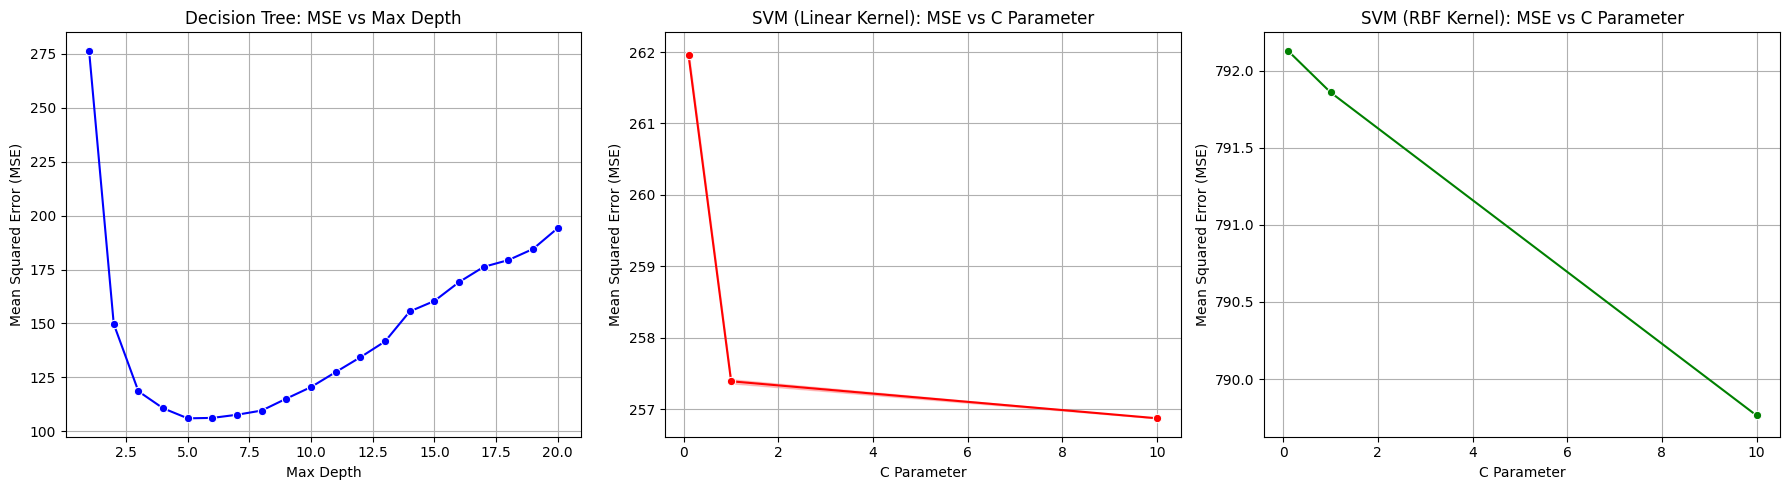

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Decision Tree and SVM results
dt_results = pd.read_csv("decision_tree_gridsearch_results.csv")  # Update file path if needed
svm_results = pd.read_csv("svm_gridsearch_full_results.csv")  # Update file path if needed

# Convert negative scores to positive MSE (if needed)
dt_results['MSE'] = abs(dt_results['Mean Test Score'])
svm_results['MSE'] = abs(svm_results['Mean Test Score'])

# Separate SVM results by Kernel type
svm_linear = svm_results[svm_results["Kernel"] == "linear"]
svm_rbf = svm_results[svm_results["Kernel"] == "rbf"]

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 🔹 Plot Decision Tree Results
sns.lineplot(
    data=dt_results,
    x="Max Depth", y="MSE",
    marker="o", ax=axes[0],
    color="blue"
)
axes[0].set_title("Decision Tree: MSE vs Max Depth")
axes[0].set_xlabel("Max Depth")
axes[0].set_ylabel("Mean Squared Error (MSE)")
axes[0].grid(True)

# 🔹 Plot SVM Results for Linear Kernel
sns.lineplot(
    data=svm_linear,
    x="C Parameter", y="MSE",
    marker="o", ax=axes[1],
    color="red"
)
axes[1].set_title("SVM (Linear Kernel): MSE vs C Parameter")
axes[1].set_xlabel("C Parameter")
axes[1].set_ylabel("Mean Squared Error (MSE)")
axes[1].grid(True)

# 🔹 Plot SVM Results for RBF Kernel
sns.lineplot(
    data=svm_rbf,
    x="C Parameter", y="MSE",
    marker="o", ax=axes[2],
    color="green"
)
axes[2].set_title("SVM (RBF Kernel): MSE vs C Parameter")
axes[2].set_xlabel("C Parameter")
axes[2].set_ylabel("Mean Squared Error (MSE)")
axes[2].grid(True)

# 🔹 Show the comparison plots
plt.tight_layout()
plt.show()

Gradient Boosting

In [13]:
import pandas as pd

# Load all saved CSV files
part1 = pd.read_csv("gb_gridsearch_part1.csv")
part2 = pd.read_csv("gb_gridsearch_part2.csv")
gb_results = pd.DataFrame({
    'Max Depth': [5, 10, 11, 16, 5, 9, 11, 16, 5, 7],
    'N Estimators': [50, 50, 50, 50, 100, 100, 100, 100, 200, 200],
    'MSE': [295.6038, 289.8581, 289.2384, 289.9627, 174.7617, 167.4993, 166.9031, 172.7890, 111.7562, 108.7751],
    'R²': [0.5257, 0.5349, 0.5359, 0.5347, 0.7196, 0.7312, 0.7322, 0.7228, 0.8207, 0.8255]
})
# Merge all parts
all_results = pd.concat([part1, part2,gb_results], ignore_index=True)

# Save merged results
all_results.to_csv("gb_gridsearch_full_results.csv", index=False)
print("Merged GridSearch results saved to gb_gridsearch_full_results.csv")

# Find the best model based on MSE
best_overall = all_results.loc[best_results['MSE'].idxmin()]

print("\nBest overall model:")
print(best_overall)

Merged GridSearch results saved to gb_gridsearch_full_results.csv

Best overall model:
Max Depth                            13.000000
N Estimators                        200.000000
Mean Test Score                    -116.610988
Standard Deviation of Test Score      9.179061
MSE                                 116.610988
R²                                         NaN
Name: 2, dtype: float64


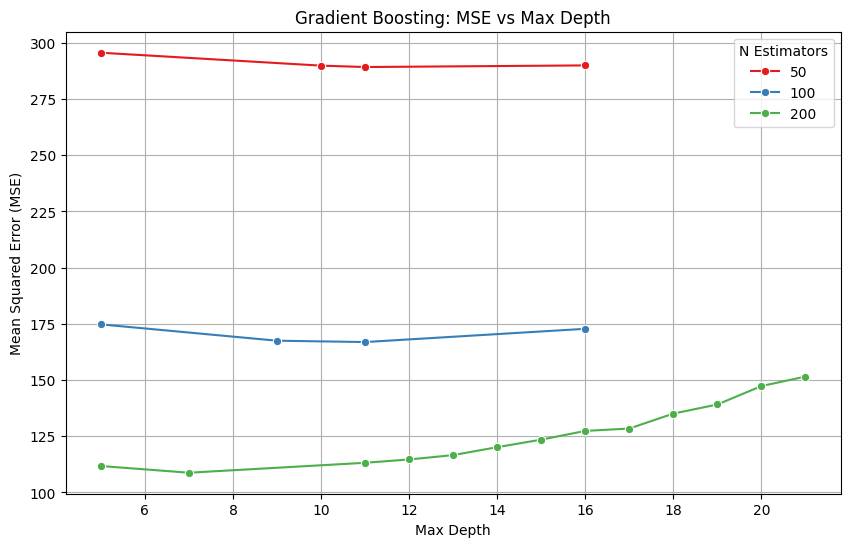

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))

# Line plot for Gradient Boosting MSE vs Max Depth
sns.lineplot(
    data=all_results,
    x="Max Depth", y="MSE",
    hue="N Estimators", marker="o",
    palette="Set1"
)

# Graph Labels
plt.title("Gradient Boosting: MSE vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend(title="N Estimators")
plt.grid(True)

# Show the graph
plt.show()

Stacking

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Sample dataset (Boston Housing)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling for SVM (since SVM is sensitive to scales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define base models
base_models = [
    ('dt', DecisionTreeRegressor(max_depth=5)),
    ('rf', RandomForestRegressor(max_depth=10,n_estimators=200, random_state=42)),
    ('svm', SVR(kernel='rbf', C=10)),  # SVM requires scaling #'C': 10, 'epsilon': 0.1, 'kernel': 'linear'
    ('xgb', XGBRegressor(n_estimators=100, objective='reg:squarederror', random_state=42)),
    ('ada', AdaBoostRegressor(n_estimators=50, random_state=42))
]

# Define meta-model (Ridge Regression in this case)
meta_model = Ridge(alpha=1.0)

# Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=False)

# Train the stacking model
stacking_regressor.fit(X_train, y_train)

# Predictions
y_pred = stacking_regressor.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Stacking Regressor RMSE: {rmse:.4f}")